## 爬虫测试

## 词云词频分析

<class 'wordcloud.wordcloud.WordCloud'>
<class 'module'>


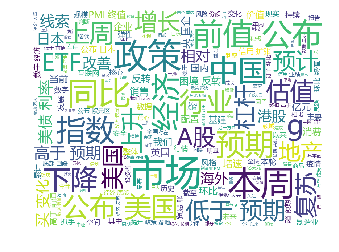

In [3]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 打开文本文件，读取内容
with open('test.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 使用jieba对文本进行分词
words = jieba.cut(text)

# 将分词结果转换为空格分隔的字符串
words_str = ' '.join(words)

#停词
std = open('./stopwords.txt',encoding="utf-8").read()

# 生成词云
wc = WordCloud(
    font_path='msyh.ttc',  # 设置字体
    background_color='white',  # 设置背景颜色
    width=800,  # 设置宽度
    height=600,  # 设置高度
    max_words=200,  # 设置最大词数
    max_font_size=100,  # 设置最大字体大小
    stopwords=std # 设置停用词
)

# 生成词云图片
wc.generate(words_str)
print(type(wc))
# 显示词云图片
plt.imshow(wc)

plt.axis('off')
print(type(plt))
plt.show()

## 文本情感分析，聚类分析

#### 首先需要对文本数据进行预处理，包括分词、去除停用词、词干化等操作

分词

In [2]:
import jieba
import jieba.analyse

# 待分词的文本路径
sourceTxt = './test.txt'
# 分好词后的文本路径
targetTxt = './test1.txt'

# 对文本进行操作
with open(sourceTxt, 'r', encoding = 'utf-8') as sourceFile, open(targetTxt, 'a+', encoding = 'utf-8') as targetFile:
    for line in sourceFile:
        seg = jieba.cut(line.strip(), cut_all = False)
        # 分好词之后之间用空格隔断
        output = ' '.join(seg)
        targetFile.write(output)
        targetFile.write('\n')
    print('写入成功！')

# 提取关键词
with open(targetTxt, 'r', encoding = 'utf-8') as file:
    text = file.readlines()
    """
    几个参数解释：
        * text : 待提取的字符串类型文本
        * topK : 返回TF-IDF权重最大的关键词的个数，默认为20个
        * withWeight : 是否返回关键词的权重值，默认为False
        * allowPOS : 包含指定词性的词，默认为空
    """
    keywords = jieba.analyse.extract_tags(str(text), topK = 10, withWeight=True, allowPOS=())
    
    print(keywords)
    print('提取完毕！')


写入成功！
[('2022', 0.060198770008678903), ('消费', 0.04536962514387441), ('军工', 0.04523767490991114), ('政策', 0.042897352212701426), ('基金', 0.03935418757581754), ('支持', 0.03910034723704976), ('关注', 0.035601732246593604), ('板块', 0.03360803360645734), ('2023', 0.031869937063418244), ('特斯拉', 0.029352118793513033)]
提取完毕！


去除停用词

In [3]:
import jieba

# jieba.load_userdict('userdict.txt')
# 创建停用词list
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords

def seg_sentence(sentence):
    sentence_seged = jieba.cut(sentence.strip())
    stopwords = stopwordslist('stopwords.txt')  # 这里加载停用词的路径
    outstr = ''
    for word in sentence_seged:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr

inputs = open('./test1.txt', 'r', encoding='utf-8')

outputs = open('./test_stopwords.txt', 'w',encoding='utf-8')
for line in inputs:
    line_seg = seg_sentence(line)  # 这里的返回值是字符串
    outputs.write(line_seg + '\n')
outputs.close()
inputs.close()


词频统计

In [4]:
import jieba
import re

#打开要处理的文章
reader = open("./test_stopwords.txt",'r',encoding='utf8')
strs =reader.read()
result = open("./test_result.txt","w")

# 分词，去重，列表
word_list = jieba.cut(strs,cut_all=True)
# 正则表达式去除数字，符号，单个字
new_words = []
for i in word_list:
    m = re.search("\d+",i)
    n = re.search("\W+",i)
    if not m and  not n and len(i)>1:
        new_words.append(i)

# 统计词频
word_count = {} # 创建字典
for i in set(new_words): # 用set去除list中的重复项
    word_count[i] = new_words.count(i)

# 格式整理
list_count = sorted(word_count.items(),key=lambda co:co[1],reverse=True)

# 打印结果
for i in range(len(list_count)):
    print(list_count[i],file=result)

#关闭文件
reader.close()
result.close()


#### 情感分析

LDA主题模型分析